<a href="https://colab.research.google.com/github/arwendy123/EDA_EPL_Player_2021-2022/blob/main/EDA_EPL_Player_2021_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np  # Importing the numpy library for numerical computing
import pandas as pd  # Importing the pandas library for data manipulation
import matplotlib.pyplot as plt  # Importing the matplotlib.pyplot module for plotting
import seaborn as sns  # Importing the seaborn library for statistical data visualization

In [3]:
# Read the CSV file containing EPL goal scorers data for the 20-21 season
df = pd.read_csv("/content/drive/MyDrive/Python/Fun_Project/EDA_EPL_Player/epl-goalScorer(20-21).csv")
df

,Unnamed: 0,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,0,647,Harry Kane,35,3097,23,22.174859,14,7.577094,138,49,1,0,F,Tottenham,19,19.130183,24.995648,4.451257
1,1,1250,Mohamed Salah,37,3085,22,20.250847,5,6.528526,126,55,0,0,F M S,Liverpool,16,15.683834,28.968234,9.800236
2,2,1228,Bruno Fernandes,37,3117,18,16.019454,12,11.474996,121,95,6,0,M S,Manchester United,9,8.407840,26.911412,11.932285
3,3,453,Son Heung-Min,37,3139,17,11.023287,10,9.512992,68,75,0,0,F M S,Tottenham,16,10.262118,20.671916,6.608751
4,4,822,Patrick Bamford,38,3085,17,18.401863,7,3.782247,107,30,3,0,F S,Leeds,15,16.879525,23.394953,4.131796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,517,9415,Jaden Philogene-Bidace,1,1,0,0.000000,0,0.000000,0,0,0,0,S,Aston Villa,0,0.000000,0.056044,0.056044
518,518,9423,Gaetano Berardi,2,113,0,0.074761,0,0.000000,1,0,0,0,D S,Leeds,0,0.074761,0.231278,0.231278
519,519,9524,Anthony Elanga,1,67,0,0.000000,0,0.000000,0,0,0,0,M,Manchester United,0,0.000000,0.000000,0.000000
520,520,9540,Femi Seriki,1,1,0,0.000000,0,0.000000,0,0,0,0,S,Sheffield United,0,0.000000,0.000000,0.000000


In [4]:
# Calculate the number of missing values in each column of the DataFrame
missing_values = df.isnull().sum()
missing_values

Unnamed: 0      0
id              0
player_name     0
games           0
time            0
goals           0
xG              0
assists         0
xA              0
shots           0
key_passes      0
yellow_cards    0
red_cards       0
position        0
team_title      0
npg             0
npxG            0
xGChain         0
xGBuildup       0
dtype: int64

In [5]:
# Calculate the number of duplicated rows in the DataFrame
duplicated_rows = df.duplicated().sum()
duplicated_rows

0

In [6]:
# Print the data types of each column in the DataFrame
print(df.dtypes)

Unnamed: 0        int64
id                int64
player_name      object
games             int64
time              int64
goals             int64
xG              float64
assists           int64
xA              float64
shots             int64
key_passes        int64
yellow_cards      int64
red_cards         int64
position         object
team_title       object
npg               int64
npxG            float64
xGChain         float64
xGBuildup       float64
dtype: object


In [7]:
# Create a new DataFrame without the first two columns
df_noid = df.iloc[:, 2:]
df_noid

,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,Harry Kane,35,3097,23,22.174859,14,7.577094,138,49,1,0,F,Tottenham,19,19.130183,24.995648,4.451257
1,Mohamed Salah,37,3085,22,20.250847,5,6.528526,126,55,0,0,F M S,Liverpool,16,15.683834,28.968234,9.800236
2,Bruno Fernandes,37,3117,18,16.019454,12,11.474996,121,95,6,0,M S,Manchester United,9,8.407840,26.911412,11.932285
3,Son Heung-Min,37,3139,17,11.023287,10,9.512992,68,75,0,0,F M S,Tottenham,16,10.262118,20.671916,6.608751
4,Patrick Bamford,38,3085,17,18.401863,7,3.782247,107,30,3,0,F S,Leeds,15,16.879525,23.394953,4.131796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Jaden Philogene-Bidace,1,1,0,0.000000,0,0.000000,0,0,0,0,S,Aston Villa,0,0.000000,0.056044,0.056044
518,Gaetano Berardi,2,113,0,0.074761,0,0.000000,1,0,0,0,D S,Leeds,0,0.074761,0.231278,0.231278
519,Anthony Elanga,1,67,0,0.000000,0,0.000000,0,0,0,0,M,Manchester United,0,0.000000,0.000000,0.000000
520,Femi Seriki,1,1,0,0.000000,0,0.000000,0,0,0,0,S,Sheffield United,0,0.000000,0.000000,0.000000


In [8]:
# Rename the 'team_title' column to 'team'
df_noid = df_noid.rename(columns={'team_title': 'team'})

In [9]:
# Generate descriptive statistics for the DataFrame
df_noid.describe()


,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,npg,npxG,xGChain,xGBuildup
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,19.643678,1420.068966,1.862069,2.000806,1.289272,1.376029,17.379310,12.963602,2.061303,0.091954,1.668582,1.821450,5.663368,3.455060
std,11.619836,1031.604819,3.338851,3.317946,2.083350,1.886510,21.572664,16.164361,2.203661,0.295800,2.909929,2.931176,5.600249,3.376584
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,470.250000,0.000000,0.074668,0.000000,0.049245,2.000000,1.000000,0.000000,0.000000,0.000000,0.074668,1.191391,0.720353
50%,21.000000,1342.000000,1.000000,0.737295,0.000000,0.691122,10.000000,7.000000,2.000000,0.000000,0.500000,0.715585,4.252738,2.656397
75%,30.000000,2319.000000,2.000000,2.053378,2.000000,2.050509,23.750000,19.000000,3.000000,0.000000,2.000000,1.945799,8.308002,5.254647
max,38.000000,3420.000000,23.000000,22.174859,14.000000,11.474996,138.000000,95.000000,12.000000,2.000000,19.000000,19.130183,28.968234,18.323006


### Premier League Team

In [10]:
# Get the unique values in the 'team' column
df_noid['team'].unique()

array(['Tottenham', 'Liverpool', 'Manchester United', 'Leeds', 'Everton',
       'Leicester', 'Aston Villa', 'Manchester City', 'Arsenal',
       'Newcastle United', 'Southampton', 'Burnley', 'Crystal Palace',
       'West Bromwich Albion', 'West Ham', 'Brighton',
       'Arsenal,Newcastle United', 'Chelsea', 'Sheffield United',
       'Wolverhampton Wanderers', 'Fulham', 'Everton,Southampton',
       'Aston Villa,Chelsea', 'Liverpool,Southampton', 'Chelsea,Fulham',
       'West Bromwich Albion,West Ham', 'Arsenal,West Bromwich Albion',
       'Arsenal,Brighton'], dtype=object)

In [11]:
def filter_rows_by_values(df, col, values):
    """
    Filter rows of a DataFrame based on a given column and a list of values.
    """
    return df[~df[col].isin(values)]

# Filter rows in df_noid based on the 'team' column and specified teams
df_noid = filter_rows_by_values(df_noid, "team", ['Arsenal,Newcastle United', 'Arsenal,West Bromwich Albion',
                                                  'Arsenal,Brighton', 'Liverpool,Southampton', 
                                                  'Everton,Southampton', 'Aston Villa,Chelsea', 
                                                  'West Bromwich Albion,West Ham', 'Chelsea,Fulham'])

# Print the unique teams in the filtered DataFrame
df_noid.team.unique()

array(['Tottenham', 'Liverpool', 'Manchester United', 'Leeds', 'Everton',
       'Leicester', 'Aston Villa', 'Manchester City', 'Arsenal',
       'Newcastle United', 'Southampton', 'Burnley', 'Crystal Palace',
       'West Bromwich Albion', 'West Ham', 'Brighton', 'Chelsea',
       'Sheffield United', 'Wolverhampton Wanderers', 'Fulham'],
      dtype=object)

### Analyzing Goals and Assists

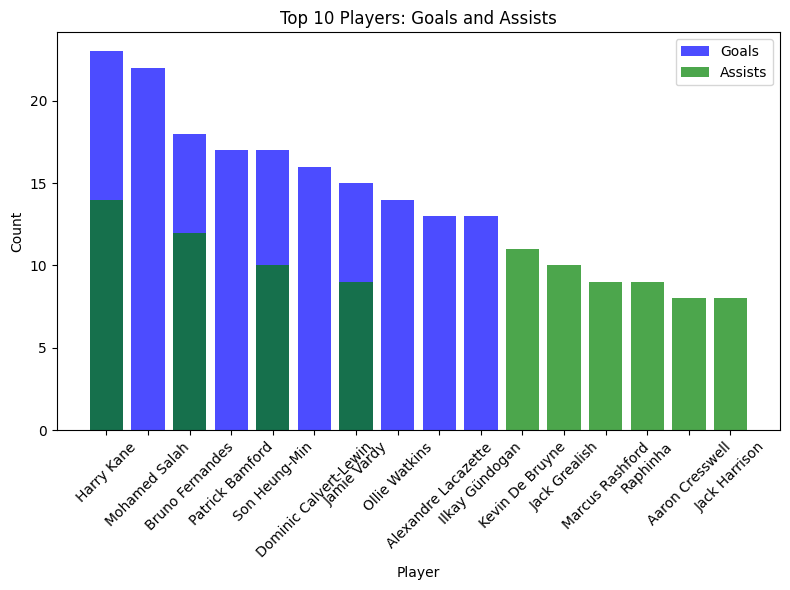

In [26]:
top_players = 10  # Number of top players to display

# Group goals and assists by player name and get the top players
goals = df_noid['goals'].groupby(df_noid['player_name']).sum().nlargest(top_players)
assists = df_noid['assists'].groupby(df_noid['player_name']).sum().nlargest(top_players)

# Create a larger figure with adjusted bar width and colors
plt.figure(figsize=(8, 6))
plt.bar(goals.index, goals.values, label='Goals', color='blue', alpha=0.7)
plt.bar(assists.index, assists.values, label='Assists', color='green', alpha=0.7)

# Add labels and title
plt.xlabel('Player')
plt.ylabel('Count')
plt.title('Top {} Players: Goals and Assists'.format(top_players))

# Add legend and rotate x-axis labels for better readability
plt.legend()
plt.xticks(rotation=45)

# Adjust spacing and improve readability
plt.tight_layout()

plt.show()


### Analyzing Goal Scoring Efficiency

<ipython-input-25-ef35dfaddc7f>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  efficient_scorers = df_noid.groupby('player_name').sum().loc[df_noid.groupby('player_name')['goals'].sum() > threshold_goals]


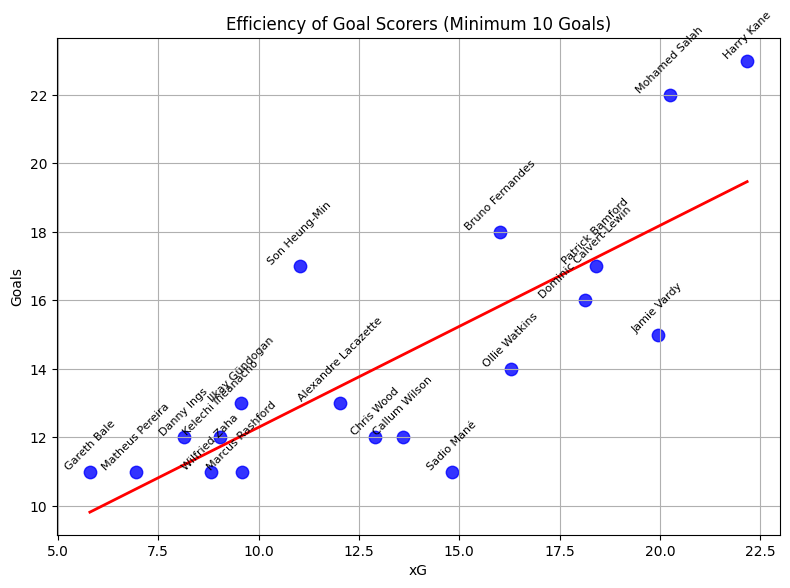

In [25]:
threshold_goals = 10  # Minimum number of goals for players to be displayed

# Filter players based on the minimum number of goals threshold
efficient_scorers = df_noid.groupby('player_name').sum().loc[df_noid.groupby('player_name')['goals'].sum() > threshold_goals]

# Extract the xG and goals values from the filtered DataFrame
xG = efficient_scorers['xG']
goals = efficient_scorers['goals']

# Create a larger figure with adjusted marker size
plt.figure(figsize=(8, 6))
plt.scatter(xG, goals, s=80, c='blue', alpha=0.8)

# Add gridlines
plt.grid(True)

# Fit and plot a trendline or regression line (optional)
coefficients = np.polyfit(xG, goals, 1)
trendline_x = np.linspace(min(xG), max(xG), 100)
trendline_y = np.polyval(coefficients, trendline_x)
plt.plot(trendline_x, trendline_y, color='red', linewidth=2)

# Annotate each point with player names (adjust position and rotation if needed)
for i, player in enumerate(efficient_scorers.index):
    plt.annotate(player, (xG[i], goals[i]), ha='center', va='bottom', rotation=45, fontsize=8)

# Add labels and title
plt.xlabel('xG')
plt.ylabel('Goals')
plt.title('Efficiency of Goal Scorers (Minimum {} Goals)'.format(threshold_goals))

# Adjust spacing and improve readability
plt.tight_layout()

plt.show()

### Analyzing Goal Assists Contribution

<ipython-input-24-3a3634a6f3b2>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  contribution_assists = df_noid.groupby('player_name').sum().loc[df_noid.groupby('player_name')['key_passes'].sum() > threshold_key_passes]


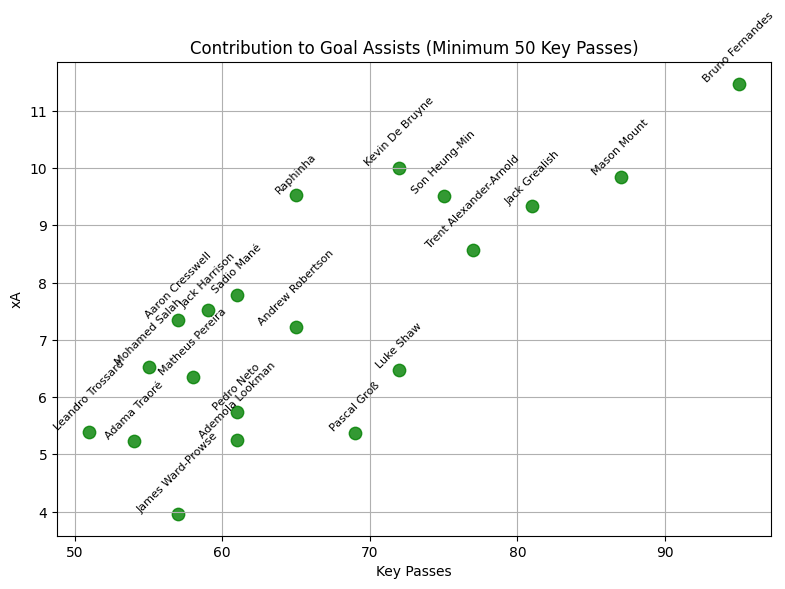

In [24]:
threshold_key_passes = 50  # Minimum number of key passes for players to be displayed

# Filter players based on the minimum number of key passes threshold
contribution_assists = df_noid.groupby('player_name').sum().loc[df_noid.groupby('player_name')['key_passes'].sum() > threshold_key_passes]

# Extract the key passes and xA values from the filtered DataFrame
key_passes = contribution_assists['key_passes']
xA = contribution_assists['xA']

# Create a larger figure with adjusted marker size
plt.figure(figsize=(8, 6))
plt.scatter(key_passes, xA, s=80, c='green', alpha=0.8)

# Add gridlines
plt.grid(True)

# Annotate each point with player names (adjust position and rotation if needed)
for i, player in enumerate(contribution_assists.index):
    plt.annotate(player, (key_passes[i], xA[i]), ha='center', va='bottom', rotation=45, fontsize=8)

# Add labels and title
plt.xlabel('Key Passes')
plt.ylabel('xA')
plt.title('Contribution to Goal Assists (Minimum {} Key Passes)'.format(threshold_key_passes))

# Adjust spacing and improve readability
plt.tight_layout()

plt.show()


### Analysis of Disciplinary Actions

In [31]:
# Calculate the total number of yellow and red cards for each player
yellow_cards = df_noid.groupby('player_name')['yellow_cards'].sum()
red_cards = df_noid.groupby('player_name')['red_cards'].sum()

# Top 5 players with the most yellow and red cards
top_yellow_cards = yellow_cards.nlargest(5)
top_red_cards = red_cards.nlargest(5)
print("Top 5 Players with Most Yellow Cards:")
print(top_yellow_cards)
print("\nTop 5 Players with Most Red Cards:")
print(top_red_cards)

# Correlation between yellow cards and goals
correlation_yellow_cards_goals = df_noid[['yellow_cards', 'goals']].corr()
print("\nCorrelation between Yellow Cards and Goals:")
print(correlation_yellow_cards_goals)

# Yellow cards by player position
yellow_cards_by_position = df_noid.groupby('position')['yellow_cards'].sum()
print("\nYellow Cards by Position:")
print(yellow_cards_by_position)


Top 5 Players with Most Yellow Cards:
player_name
John McGinn              12
Conor Gallagher          11
Harry Maguire            11
Kalvin Phillips          10
Pierre-Emile Højbjerg     9
Name: yellow_cards, dtype: int64

Top 5 Players with Most Red Cards:
player_name
Lewis Dunk             2
Aboubakar Kamara       1
Alexandre Jankewitz    1
Andreas Christensen    1
Anthony Martial        1
Name: red_cards, dtype: int64

Correlation between Yellow Cards and Goals:
              yellow_cards     goals
yellow_cards      1.000000  0.100748
goals             0.100748  1.000000

Yellow Cards by Position:
position
D          150
D F M S     18
D M         53
D M S      136
D S        170
F            3
F M          3
F M S      133
F S         38
GK          25
GK S         3
M           49
M S        280
S            5
Name: yellow_cards, dtype: int64


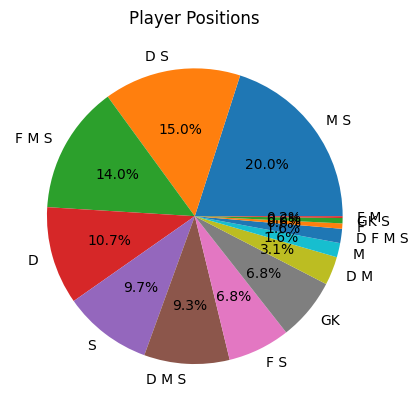

In [37]:
position_counts = df_noid['position'].value_counts()
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%')
plt.title('Player Positions')
plt.show()


### Team Analysis

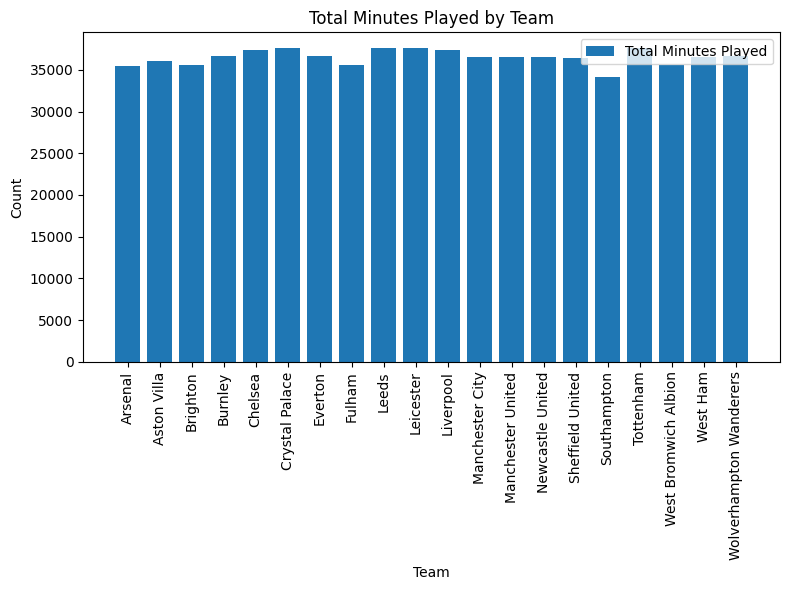

In [54]:
# Calculate the number of games and total minutes played per team
games = df_noid.groupby('team')['games'].max()
total_minutes = df_noid.groupby('team')['time'].sum()

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Create bar plots for games and total minutes played
ax.bar(total_minutes.index, total_minutes.values, label='Total Minutes Played')

# Set the labels and title
ax.set_xlabel('Team')
ax.set_ylabel('Count')
ax.set_title('Total Minutes Played by Team')

# Add legend and rotate x-axis labels for better readability
plt.legend()
plt.xticks(rotation=90)

# Adjust spacing and improve readability
plt.tight_layout()

# Show the plot
plt.show()


In [55]:
# Calculate the total number of goals scored by each team
goals_by_team = df_noid.groupby('team')['goals'].sum()

# Select the top 5 teams with the most goals
top_goals_team = goals_by_team.nlargest(5)

# Print the top 5 teams with the most goals
print("Top 5 Teams with Most Goals:")
print(top_goals_team)

# Calculate the average expected assists (xA) for each team
xA_by_team = df_noid.groupby('team')['xA'].mean()

# Select the top 5 teams with the highest average xA
top_xA_team = xA_by_team.nlargest(5)

# Print the top 5 teams with the highest average xA
print("\nTop 5 Teams with Highest Expected Assists (xA) Average:")
print(top_xA_team)

# Calculate the goals per game ratio for each team
goals_per_game = goals_by_team / games

# Print the goals per game by team
print("\nGoals per Game by Team:")
print(goals_per_game)


Top 5 Teams with Most Goals:
team
Manchester City      77
Manchester United    68
Tottenham            66
Leicester            64
Liverpool            64
Name: goals, dtype: int64

Top 5 Teams with Highest Expected Assists (xA) Average:
team
Manchester City    2.223699
Leeds              1.976310
Liverpool          1.954677
Chelsea            1.873667
West Ham           1.871923
Name: xA, dtype: float64

Goals per Game by Team:
team
Arsenal                    1.500000
Aston Villa                1.289474
Brighton                   1.114286
Burnley                    0.864865
Chelsea                    1.555556
Crystal Palace             1.054054
Everton                    1.285714
Fulham                     0.694444
Leeds                      1.578947
Leicester                  1.684211
Liverpool                  1.684211
Manchester City            2.200000
Manchester United          1.837838
Newcastle United           1.058824
Sheffield United           0.486486
Southampton            